In [8]:
import cmath
import math
import pandas as pd

In [ ]:
def get_relative_error(values, expected):
    return [abs(x - expected) / expected for x in values]

In [9]:
# Function that we're going to numerically differentiate
def f(x):
    return cmath.exp(x) if isinstance(x, complex) else math.exp(x)

In [10]:
stepsizes = [10 ** -n for n in range(17)]
a = 0
expected = 1

In [11]:
forward_differences = [(f(a + h) - f(a)) / h for h in stepsizes]
backward_differences = [(f(a) - f(a - h)) / h for h in stepsizes]
centered_differences = [(f(a + h) - f(a - h)) / (2 * h) for h in stepsizes]
complex_step = [(f(complex(a,h)) / h).imag for h in stepsizes]

In [12]:
fdiff_rel_error = get_relative_error(forward_difference, expec
bdiff_rel_error = [abs(value - expected) / expected for value in backward_differences]
cdiff_rel_error = [abs(value - expected) / expected for value in centered_differences]
cstep_rel_error = [abs(value - expected) / expected for value in complex_step]

In [13]:
diff_data = {
    "Stepsize": stepsizes,
    "Forward difference": forward_differences,
    "Backward difference": backward_differences,
    "Centered difference": centered_differences,
    "Complex step": complex_step
}

err_data = {
    "Stepsize": stepsizes,
    "Forward difference": fdiff_rel_error,
    "Backward difference": bdiff_rel_error,
    "Centered difference": cdiff_rel_error,
    "Complex step": cstep_rel_error
}

df_diff = pd.DataFrame.from_dict(diff_data)
df_err = pd.DataFrame.from_dict(err_data)

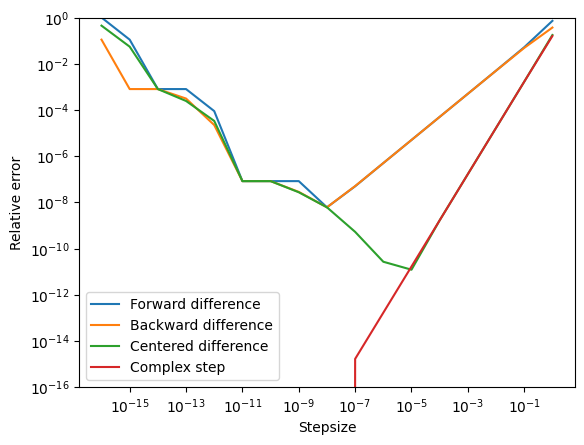

In [14]:
import matplotlib.pyplot as plt

plt.plot(stepsizes, fdiff_rel_error, label="Forward difference")
plt.plot(stepsizes, bdiff_rel_error, label="Backward difference")
plt.plot(stepsizes, cdiff_rel_error, label="Centered difference")
plt.plot(stepsizes, cstep_rel_error, label="Complex step")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Stepsize")
plt.ylabel("Relative error")
plt.ylim(10 ** -16, 10 ** 0)
plt.legend()